<header style="padding: 4em 0 0em 0">
    <img src="http://brentyi.github.io/filestore/ai4all_logo.svg" style="width: 30em; height: auto;" />
    <h3 style="margin: 1em 0 0 0;">
        <strong>Computer Vision I</strong>
        <span style="color: #777">
        &nbsp;&blacksquare;&nbsp;
        Robotics, Summer 2020</span>
    </h3>
</header>

<hr style="border-top: 0.4em solid #eee;" />

Today, we'll kick off our Computer Vision unit by exploring the foundations of how images are represented and manipulated in Python.

Our core goals will be to:
1. Get familiar with **NumPy**, a powerful library for working with numbers in Python
2. Visualize color spaces: **Grayscale**, **RGB**, and **HSL**
3. Use NumPy to implement some functions for image processing: **cropping** and **resizing**

<hr style="border-top: 0.4em solid #eee;" />

## 1. Getting Started With NumPy

Before we start using NumPy, we need to import it! Run the cell below to do just that:

In [1]:
import numpy as np

### a) Code Study

The primary feature of NumPy is the **NumPy array** &mdash; a versatile way to work with collections of numbers in Python.

In many ways, these are very similar to the native Python `list` collection, which we looked at last week. A big chunk of the syntax is actually identical!

To highlight some of these similarities, try walking through these examples:


In [2]:
# Create two sets of numbers: one as a native list, and the other as a NumPy array
list_numbers = [1, 2, 3, 4]
array_numbers = np.array([1, 2, 3, 4])

# Print each set of numbers: they should look the same!
print("list_numbers =", list_numbers)
print("array_numbers =", array_numbers)
print()

# Index into each collection of numbers
print("list_numbers[0] =", list_numbers[0])
print("array_numbers[0] =", array_numbers[0])
print()

# Grab a "slice" of each collection of numbers
print("list_numbers[1:3] =", list_numbers[1:3])
print("array_numbers[1:3] =", array_numbers[1:3])
print()

# Get the lengths of each collection
print("len(list_numbers) =", len(list_numbers))
print("len(array_numbers) =", len(array_numbers))
print()

# Iterate over each collection
print("Iterating over list:")
for number in list_numbers:
    print(">", number)

print("Iterating over array:")
for number in array_numbers:
    print(">", number)

list_numbers = [1, 2, 3, 4]
array_numbers = [1 2 3 4]

list_numbers[0] = 1
array_numbers[0] = 1

list_numbers[1:3] = [2, 3]
array_numbers[1:3] = [2 3]

len(list_numbers) = 4
len(array_numbers) = 4

Iterating over list:
> 1
> 2
> 3
> 4
Iterating over array:
> 1
> 2
> 3
> 4


Okay &mdash; so if lists and arrays are so similar, why would we ever want to use arrays?

Let's answer this question with a few code studies! To see what's going on, you're encouraged to experiment with each code block: change numbers, add print statements, anything you want.

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study #1: Element-wise Square</div>

In [3]:
a = np.array([1, 2, 3, 4])
b = a ** 2

What are the values of `a` and `b` after this block of code has been run?

How would you implement this if `a` is instead defined as a native Python list?

> *Your response here!*

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study #2: Element-wise Summation</div>

In [4]:
a = np.array([1, 2, 3, 4])
b = np.array([0, 1, 0, 2])
c = a + b
d = c + 2


What are the values of `a`, `b`, `c`, `d` after this block of code has been run?

How would you implement this with native Python lists?

> *Your response here!*


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study #3: Multi-dimensional Arrays</div>

In [5]:
# fmt: off
a = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0],
])
# fmt: on
a[0:2, 0:2] = 1
a[4, 4] = 2

b = np.ones(shape=(2, 2, 3))

c = np.sum(a)

d = b[:, :, 0]

What are the values of `a`, `b`, `c`, `d` after this block of code has been run?

How many individual numbers do each hold?

How would you implement this with native Python lists?

> *Your response here!*

### b) NumPy Exercise: Fast Euclidean Distance

To wrap up our overview of NumPy, let's implement something fun &mdash; a helper function for computing the Euclidean distance between two points!

In the 2-dimensional case, computing the Euclidean distance reduces to solving the Pythagorean theorem $c = \sqrt{a^2 + b^2}$:

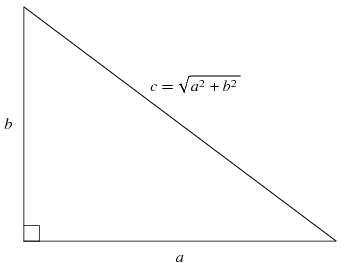

...where, given two points $(x_1, y_1)$ and $(x_2, y_2)$, $a = x_1 - x_2$ and $b = y_1 - y_2$.


More generally, given two $n$-dimensional vectors, the Euclidean distance can be computed by:

1. Performing an elementwise subtraction between the two vectors, to get $n$ difference values
2. Squaring each of the $n$ difference values, and summing the squares
4. Taking the square root of our sum

Alternatively, the Euclidean distance between length-$n$ vectors $u$ and $v$ can be written as:

$
\quad\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$


Using standard Python lists, we've provided a baseline implementation of thie calculation, called `euclidean_distance_native()`.

Your job: try implementing this using NumPy!

In [6]:
def euclidean_distance_native(u, v):
    """Computes the Euclidean distance between two vectors, represented as Python
    lists.
    
    Args:
        u (List[float]): A vector, represented as a list of floats.
        v (List[float]): A vector, represented as a list of floats.

    Returns:
        float: Euclidean distance between `u` and `v`.
    """
    # First, run some checks:
    assert isinstance(u, list)
    assert isinstance(v, list)
    assert len(u) == len(v)

    # Compute the distance!
    squared_distance = 0.0
    for i in range(len(u)):
        # Note that '**' is the exponent operator
        difference = u[i] - v[i]
        squared_distance += difference ** 2
    return squared_distance ** 0.5

In [7]:
def euclidean_distance_numpy(u, v):
    """Computes the Euclidean distance between two vectors, represented as NumPy
    arrays.
    
    Args:
        u (np.ndarray): A vector, represented as a NumPy array.
        v (np.ndarray): A vector, represented as a NumPy array.

    Returns:
        float: Euclidean distance between `u` and `v`.
    """
    # First, run some checks:
    assert isinstance(u, np.ndarray)
    assert isinstance(v, np.ndarray)
    assert u.shape == v.shape

    # Compute the distance!
    # Note:
    #  1) You shouldn't need any loops
    #  2) Some functions you can Google that might be useful: np.sqrt(), np.sum()

    # ~~START DELETE~~
    return np.sqrt(np.sum((u - v) ** 2))
    # ~~END DELETE~~

Once you've implemented this algorithm, let's check that it works!

First, verify that your distance implementation gets the same results as ours:

In [8]:
# Check 2D case
a = [0.0, 0.0]
b = [3.0, 4.0]
a_array = np.array(a)
b_array = np.array(b)

print("Correct:", euclidean_distance_native(a, b))
print("Yours:", euclidean_distance_numpy(a_array, b_array))
print()

# Check 3D case
a = [1.0, 2.0, 3.0]
b = [4.0, 7.0, 1.0]
a_array = np.array(a)
b_array = np.array(b)

print("Correct:", euclidean_distance_native(a, b))
print("Yours:", euclidean_distance_numpy(a_array, b_array))
print()

Correct: 5.0
Yours: 5.0

Correct: 6.164414002968976
Yours: 6.164414002968976



Next, let's take a look at how these two implementations compare in terms of runtime:

In [9]:
n = 1000

# Create some n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
import time

start_time = time.time()
for i in range(1000):
    euclidean_distance_native(a, b)
print(
    "euclidean_distance_native runtime (milliseconds): ",
    (time.time() - start_time) * 1000.0,
)

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(1000):
    euclidean_distance_numpy(a_array, b_array)
print(
    "euclidean_distance_numpy runtime (milliseconds): ",
    (time.time() - start_time) * 1000.0,
)

euclidean_distance_native runtime (milliseconds):  171.74839973449707
euclidean_distance_numpy runtime (milliseconds):  9.030342102050781


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Fast Euclidean Distance</div>

Compare and contrast your Euclidean distance implementation to the provided one.

What does `time.time()` return? (Google may be helpful here)

How do your function compare to the provided one in terms of runtime? Try out different values for `n` -- when is it faster or slower? Where might the runtime difference appearmpkk?

> *Your response here!*


## 2. Image Representations

Now that we have a basic sense of how NumPy works, we can start representing images with it!

### a) Grayscale

We can represent our grayscale images as 2D grids of numbers, where the number in each grid cell corresponds to an "intensity".

An intensity of `1.0` corresponds to white, `0.0` corresponds to black, and all numbers in between to shades of gray.


Here's an example &mdash;

In [10]:
mystery_image = np.zeros(shape=(10, 10))

for row in range(10):
    mystery_image[row, :] = (row / 20.0) + 0.1

mystery_image[3, 3] = 1.0
mystery_image[3, 6] = 1.0

mystery_image[6, 3:7] = 1.0
mystery_image[5, 2] = 1.0
mystery_image[5, 7] = 1.0

print(mystery_image)

[[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]
 [0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15]
 [0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 ]
 [0.25 0.25 0.25 1.   0.25 0.25 1.   0.25 0.25 0.25]
 [0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 ]
 [0.35 0.35 1.   0.35 0.35 0.35 0.35 1.   0.35 0.35]
 [0.4  0.4  0.4  1.   1.   1.   1.   0.4  0.4  0.4 ]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]
 [0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55]]


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Single-channel Visualization</div>

Oof, the raw matrix is pretty hard to interpret!

Rather than looking at our images as a grid of numbers, let's visualize them with `matplotlib` instead.

We've provided a helper function, `visualize_single_channel`, for displaying 2D arrays as grayscale images. Take a look at how it was implemented, and use it to visualize `mystery_image` from above -- what do you see? How was it created?

> Your response here!


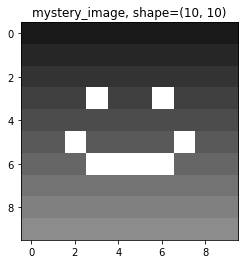

In [11]:
from cv_helpers import visualize_single_channel

# ~~START DELETE~~
visualize_single_channel("mystery_image", mystery_image)
# ~~END DELETE~~

### b) RGB

Let's now trying playing with some bigger, full-color images!

While grayscale images only need a single intensity channel per pixel, recall that color images are typically represented with three: a red chanel, green channel, and a blue channel.

Run the cell below to load & display an RGB image:

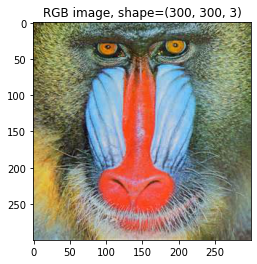

In [12]:
from cv_helpers import load_image, visualize_rgb

rgb_image = load_image("cv_assets/baboon.jpg")
visualize_rgb("RGB image", rgb_image)

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: RGB Visualization</div>

Neat &mdash; we have color!

Fill out the code cell below to independently visualize each of the three channels, and see if you can answer these questions:

1) What shape is the `rgb_image` array? What does each dimension<sup>1</sup> correspond to?

2) In which channel are the eyes of the baboon the dimmest? Why?

3) In which channel is the nose of the baboon the brightest? Why?

> Your response here!


<span style="color: #aaa"><sup>1</sup> If an array has shape (7, 5), it has 2 dimensions, shape (7, 5, 8) has 3 dimensions, etc</span>

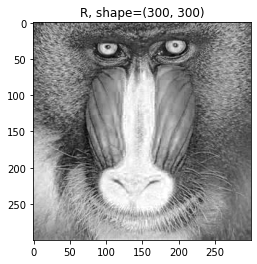

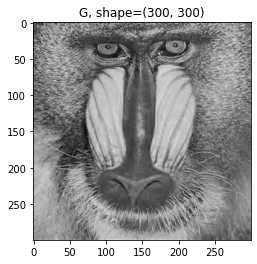

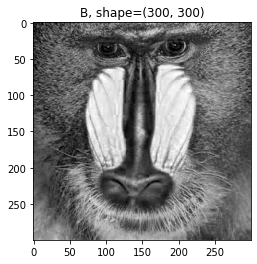

In [13]:
r_channel = None
g_channel = None
b_channel = None

# Index into `rgb_image` to get the R, G, and B channels
# > This should be 3 lines
# > If you're stuck, Code Study #3 might be useful!
# ~~START DELETE~~
r_channel = rgb_image[:, :, 0]
g_channel = rgb_image[:, :, 1]
b_channel = rgb_image[:, :, 2]
# ~~END DELETE~~

assert rgb_image.shape == (300, 300, 3)
assert r_channel.shape == (300, 300)
assert g_channel.shape == (300, 300)
assert b_channel.shape == (300, 300)

# Visualize each channel using `visualize_single_channel()`
# > This should be 3 lines, and generate 3 plots
# ~~START DELETE~~
visualize_single_channel("R", r_channel)
visualize_single_channel("G", g_channel)
visualize_single_channel("B", b_channel)
# ~~END DELETE~~

### c) HSL

While RGB is the most common way colors are represented, it's by no means our only option.

One common alternative is HSL, which standards for hue, saturation, and lightness. Take a look at how adjusting each of these three channels affects the outputted color:

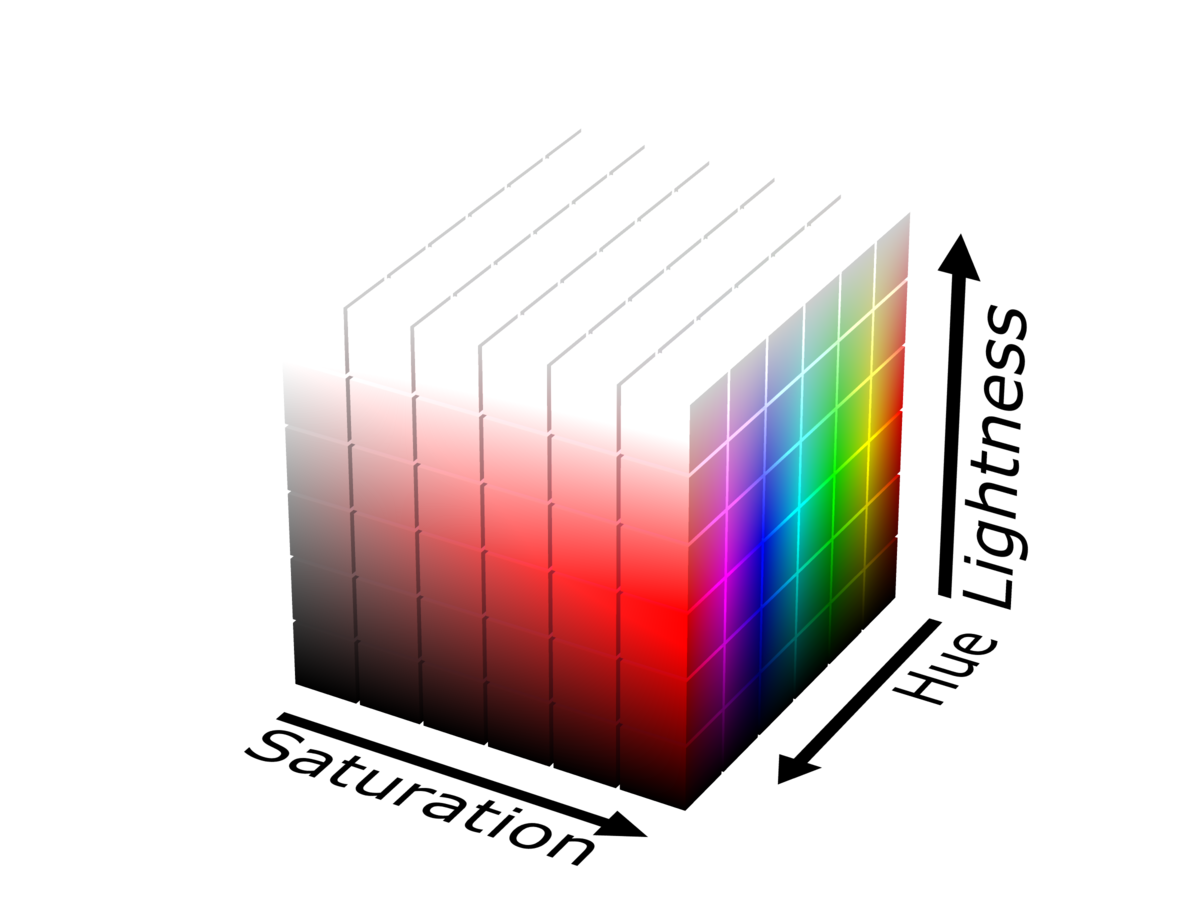

For convenience, we've provided some helper functions for converting between RGB and HSL. Take a quick look at how they were implemented, then import them:

In [14]:
from cv_helpers import rgb2hsl, hsl2rgb

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: HSL Visualization</div>

Use the code cell below to visualize the H, S, and L channels corresponding to the baboon image from earlier. The code for this should be almost the same as your RGB visualization!

1) Which of the channels most resembles the original image? Why?

2) How might you convert an image to grayscale?

3) The nose of the baboon is extremely dark in the H channel, but bright in the S channel &mdash; why do you think this is?

> Your response here!


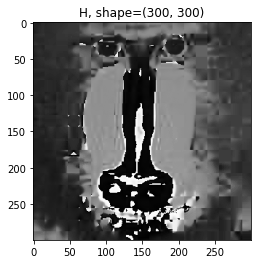

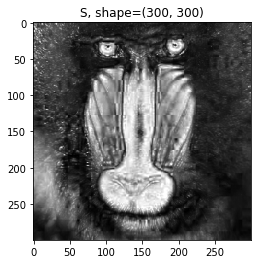

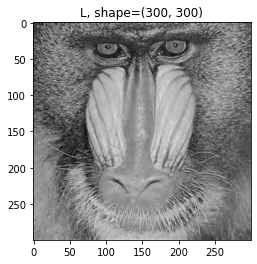

In [15]:
# Convert RGB image to HSL
hsl_image = rgb2hsl(rgb_image)
assert hsl_image.shape == (300, 300, 3)

h_channel = None
s_channel = None
l_channel = None

# Index into `hsl_image` to get the H, S, and L channels
# > This should be 3 lines
# > If you're stuck, Code Study #3 might be useful!
# ~~START DELETE~~
h_channel = hsl_image[:, :, 0]
s_channel = hsl_image[:, :, 1]
l_channel = hsl_image[:, :, 2]
# ~~END DELETE~~

assert h_channel.shape == (300, 300)
assert s_channel.shape == (300, 300)
assert l_channel.shape == (300, 300)

# Visualize each channel using `visualize_single_channel()`
# > This should be 3 lines, and generate 3 plots
# ~~START DELETE~~
visualize_single_channel("H", h_channel)
visualize_single_channel("S", s_channel)
visualize_single_channel("L", l_channel)
# ~~END DELETE~~

## 3. Image Processing

Let's take a look at different ways we can actually process and manipulate images.

We'll be switching over to RGB for the remainder of our Computer Vision notebooks, but do still keep other color representations in mind &mdash; they might come in handy when we start discussing feature engineering for machine learning.

### a) Cropping

One of the most common operations we perform when working with images is rectangular **cropping**, or the action of removing unwanted outer areas of an image:

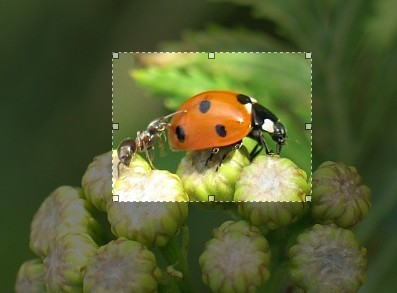

Take a look at this code we've written to crop out everything but the eyes of our baboon from above:

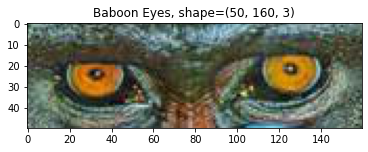

In [16]:
visualize_rgb("Baboon Eyes", rgb_image[10:60, 70:230, :])

Notice that this can be equivalently written as:

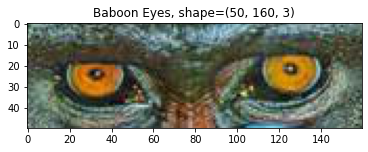

In [17]:
visualize_rgb("Baboon Eyes", rgb_image[10:60, 70:-70, :])

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Cropping</div>

Take a look at each cropping operation from above: what do each of the numbers represent?

Try cropping the image for yourself in the cell below; see if you can pull out a 100x100 square from the bottom left of `rgb_image`.

> Your response here!


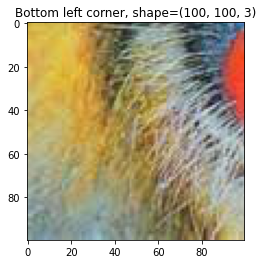

In [18]:
# ~~START DELETE~~
visualize_rgb("Bottom left corner", rgb_image[-100:, :100, :])
# ~~END DELETE~~

### b) Resizing

Finally, let's wrap up with another commonly used operation: image resizing!

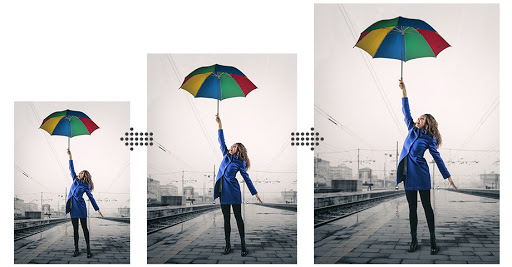

At a high level, image resizing should go something like this:

1. We create an (initially empty) output array of the desired size, `output_image`
2. We iterate over each pixel position `(i,j)` in the output image
    - For each output pixel, we compute a corresponding input pixel `(input_i, input_j)`
    - We assign `output_image[i, j, :]` to `input_image[input_i, input_j, :]`
3. We return the resized output image

For computing `input_i` and `input_j`, we'll use the "nearest neighbor" method.
We want these to increase proportionally with `i` and `j` respectively:

- `input_i` can be computed as `int(i * row_scale_factor)`
- `input_j` can be computed as `int(j * col_scale_factor)`

...where `int()` takes a number and rounds it down to the nearest integer, and `row_scale_factor` and `col_scale_factor` are constants computed from the image input/output sizes.

Try to figure out what `row_scale_factor` and `col_scale_factor` should be, and implement this algorithm in the skeleton below!

In [19]:
def resize_image(input_image, output_rows, output_cols):
    """Resize an image using the nearest neighbor method.
    
    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        output_rows (int): Number of rows in our desired output image.
        output_cols (int): Number of columns in our desired output image.

    Returns:
        (np.ndarray): Resized image, with shape `(output_rows, output_cols, 3)`.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create the resized output image
    output_image = np.zeros(shape=(output_rows, output_cols, 3))

    # 2. Populate the `output_image` array using values from `input_image`
    #    > This should require two nested for loops!
    # ~~START DELETE~~
    for i in range(output_rows):
        for j in range(output_cols):
            input_i = int(i / output_rows * input_rows)
            input_j = int(j / output_cols * input_cols)
            output_image[i, j, :] = input_image[input_i, input_j, :]
    # ~~END DELETE~~

    # 3. Return the output image
    return output_image

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Resizing</div>

Run the cells below to test out your image resizing algorithm!

When you downsize the baboon, you should expect an output that looks something like this:

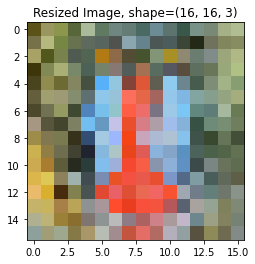

Question: in the resize algorithm we describe above, the output is populated by iterating over the indices of the output image. Could we implement image resizing by iterating over the indices of the input image instead? How do the two approaches compare?

> *Your response here!*

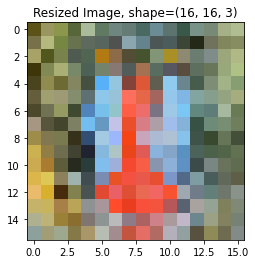

In [20]:
# Visualize downsizing an image
visualize_rgb("Resized Image", resize_image(rgb_image, 16, 16))

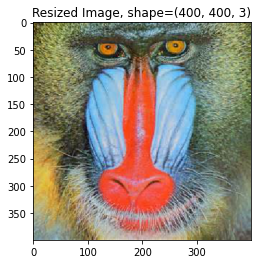

In [21]:
# Visualizing upsizing an image
visualize_rgb("Resized Image", resize_image(rgb_image, 400, 400))

### c) Bonus: Image Rotation

For those of you who've gotten this far &mdash; congratulations, you're done!

If you have extra time, one more operation that  you can try implementing is **image rotation**. This is a real interview question that we've encountered for actual computer vision jobs (notably at Facebook) and requires some mathier trigonometric thinking, so it'll for sure be challenging!

For an input angle of $\pi/4$ (45 degrees), the expected output is:

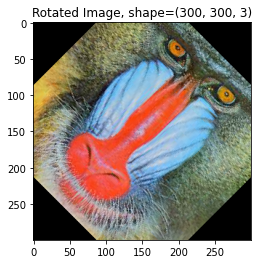

In [35]:
def rotate_image(input_image, theta):
    """Rotate an image by some angle theta.
    
    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        theta (float): Angle to rotate our image by, in radians.

    Returns:
        (np.ndarray): Rotated image, with the same shape as the input.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create an output image with the same shape as the input
    output_image = np.zeros_like(input_image)

    # 2. Populate the `output_image` array using values from `input_image`
    #    > This should require two nested for loops!
    # ~~START DELETE~~
    R = np.array(
        [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    )
    center = np.array([[input_rows // 2, input_cols // 2]]).T
    for i in range(input_rows):
        for j in range(input_cols):
            input_i, input_j = (
                (R @ (np.array([[i, j]]).T - center) + center)
                .squeeze()
                .astype(np.int64)
            )
            if 0 <= input_i < input_rows and 0 <= input_j < input_cols:
                output_image[i, j, :] = input_image[input_i, input_j, :]
    # ~~END DELETE~~

    # 3. Return the output image
    return output_image

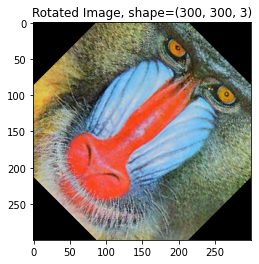

In [40]:
visualize_rgb("Rotated Image", rotate_image(rgb_image, np.pi / 4.0))